In [1]:
import os

class SentenceCorpus(object):

    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        with open(self.filename, "r") as i:
            for line in i:
                tokens = line.strip().split()
                yield tokens
                
from google.colab import drive
drive.mount('/content/gdrive') 
#FILE=open('/content/gdrive/My Drive/H0.txt', 'r')               
FILE = os.path.join("", '/content/gdrive/My Drive/H0.txt')
sentences = SentenceCorpus(FILE)
files = os.listdir('/content/gdrive/My Drive/')
print(sentences)
# sample = open("H0.txt", "r") 
# s = sample.read() 

Mounted at /content/gdrive


In [3]:

import gensim

model = gensim.models.Word2Vec(sentences, min_count=0, window=5, size=100)

In [4]:
model.wv["and"]

array([ 0.8826965 ,  0.38846815,  0.09809953, -1.3067077 ,  0.5374314 ,
       -0.35204753, -0.3878274 ,  2.4078605 , -0.4216321 ,  1.9687977 ,
        0.85154873, -2.1333377 , -0.26360843, -0.4876122 ,  0.9692542 ,
        0.18560274,  0.82528126,  0.9340886 ,  1.5142455 ,  0.5965092 ,
        1.4113942 , -0.10875519,  0.17933105, -1.2710749 , -0.5154398 ,
        0.92179656, -2.374467  , -1.2886763 , -0.15217997, -0.10302594,
       -0.707664  ,  0.38099006, -0.14646631,  1.9952619 , -0.21375279,
        0.93997616,  0.46246058, -1.1643825 , -0.0884298 ,  0.8022848 ,
       -0.85747385,  0.57183665,  0.47689024,  1.5595193 , -0.00405705,
       -0.04941986, -0.39235637, -1.1671662 , -0.03447884, -1.764719  ,
        1.6466852 , -0.955301  ,  0.35376033,  0.36725   ,  1.3587112 ,
       -0.02519272, -0.00299253, -0.06737693,  0.4134533 , -0.7846684 ,
        0.9349545 ,  0.01692441, -0.03885156, -1.2592771 ,  1.6925538 ,
        0.60466087, -0.1518387 ,  1.3909723 ,  0.43448946, -0.55

In [7]:
print(model.wv.similarity("Harry", "Hermione"))
print(model.wv.similarity("Ron", "Hermione"))
print(model.wv.similarity("girl", "Ron"))
print(model.wv.similarity("girl", "Hermione"))
print(model.wv.similarity("Hogwarts", "Hermione"))
print(model.wv.similarity("Harry", "boy"))


0.7496341
0.82457954
0.389497
0.40207434
0.13642916
0.28295207


In [8]:
model.wv.similar_by_word("Harry", topn=10)

[('Malfoy', 0.8792036771774292),
 ('Hagrid', 0.864622175693512),
 ('he', 0.8612086772918701),
 ('Snape', 0.8097145557403564),
 ('He', 0.7989659309387207),
 ('Neville', 0.7934213876724243),
 ('Dumbledore', 0.7855510711669922),
 ('him,', 0.7544794678688049),
 ('Hermione', 0.7496342062950134),
 ('Lupin', 0.7385132312774658)]

In [9]:
model.wv.similar_by_word("Hermione,", topn=10)

[('Ron,', 0.939453125),
 ('Fred,', 0.8904063701629639),
 ('Harry,', 0.8852765560150146),
 ('Hagrid,', 0.8702951669692993),
 ('Ginny,', 0.8683426976203918),
 ('Hermione.', 0.8550478219985962),
 ('Dumbledore,', 0.8437694907188416),
 ('Malfoy,', 0.8299006223678589),
 ('Luna,', 0.8272872567176819),
 ('Lupin,', 0.8204922676086426)]

In [10]:
model.wv.most_similar(positive=['Harry', 'Ron'], negative=["girl"], topn=10)

[('Hagrid', 0.7200209498405457),
 ('Hermione', 0.7064611911773682),
 ('resurface;', 0.6570144891738892),
 ('Malfoy', 0.6527138948440552),
 ('he', 0.6514991521835327),
 ('envelopes!?', 0.630794882774353),
 ('Ginny', 0.62723708152771),
 ('flower?s', 0.6250357627868652),
 ('?Treachery!?', 0.6230291128158569),
 ('him,', 0.6134283542633057)]

In [11]:
model.wv.most_similar(negative=["magic"], topn=10)


[('jokes,?', 0.7092176079750061),
 ('striking.', 0.6784751415252686),
 ('?Cousin,?', 0.6313853859901428),
 ('gorilla,', 0.621650755405426),
 ('illuminating,?', 0.594048261642456),
 ('firelight:', 0.577412486076355),
 ('suspect,?', 0.5706218481063843),
 ('righ?!?', 0.5597401261329651),
 ('half-true;', 0.5555616617202759),
 ('Hours', 0.5542142987251282)]

In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [13]:
target_word = "Hogwarts"
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=1000)]
embeddings = [model.wv[w] for w in selected_words]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

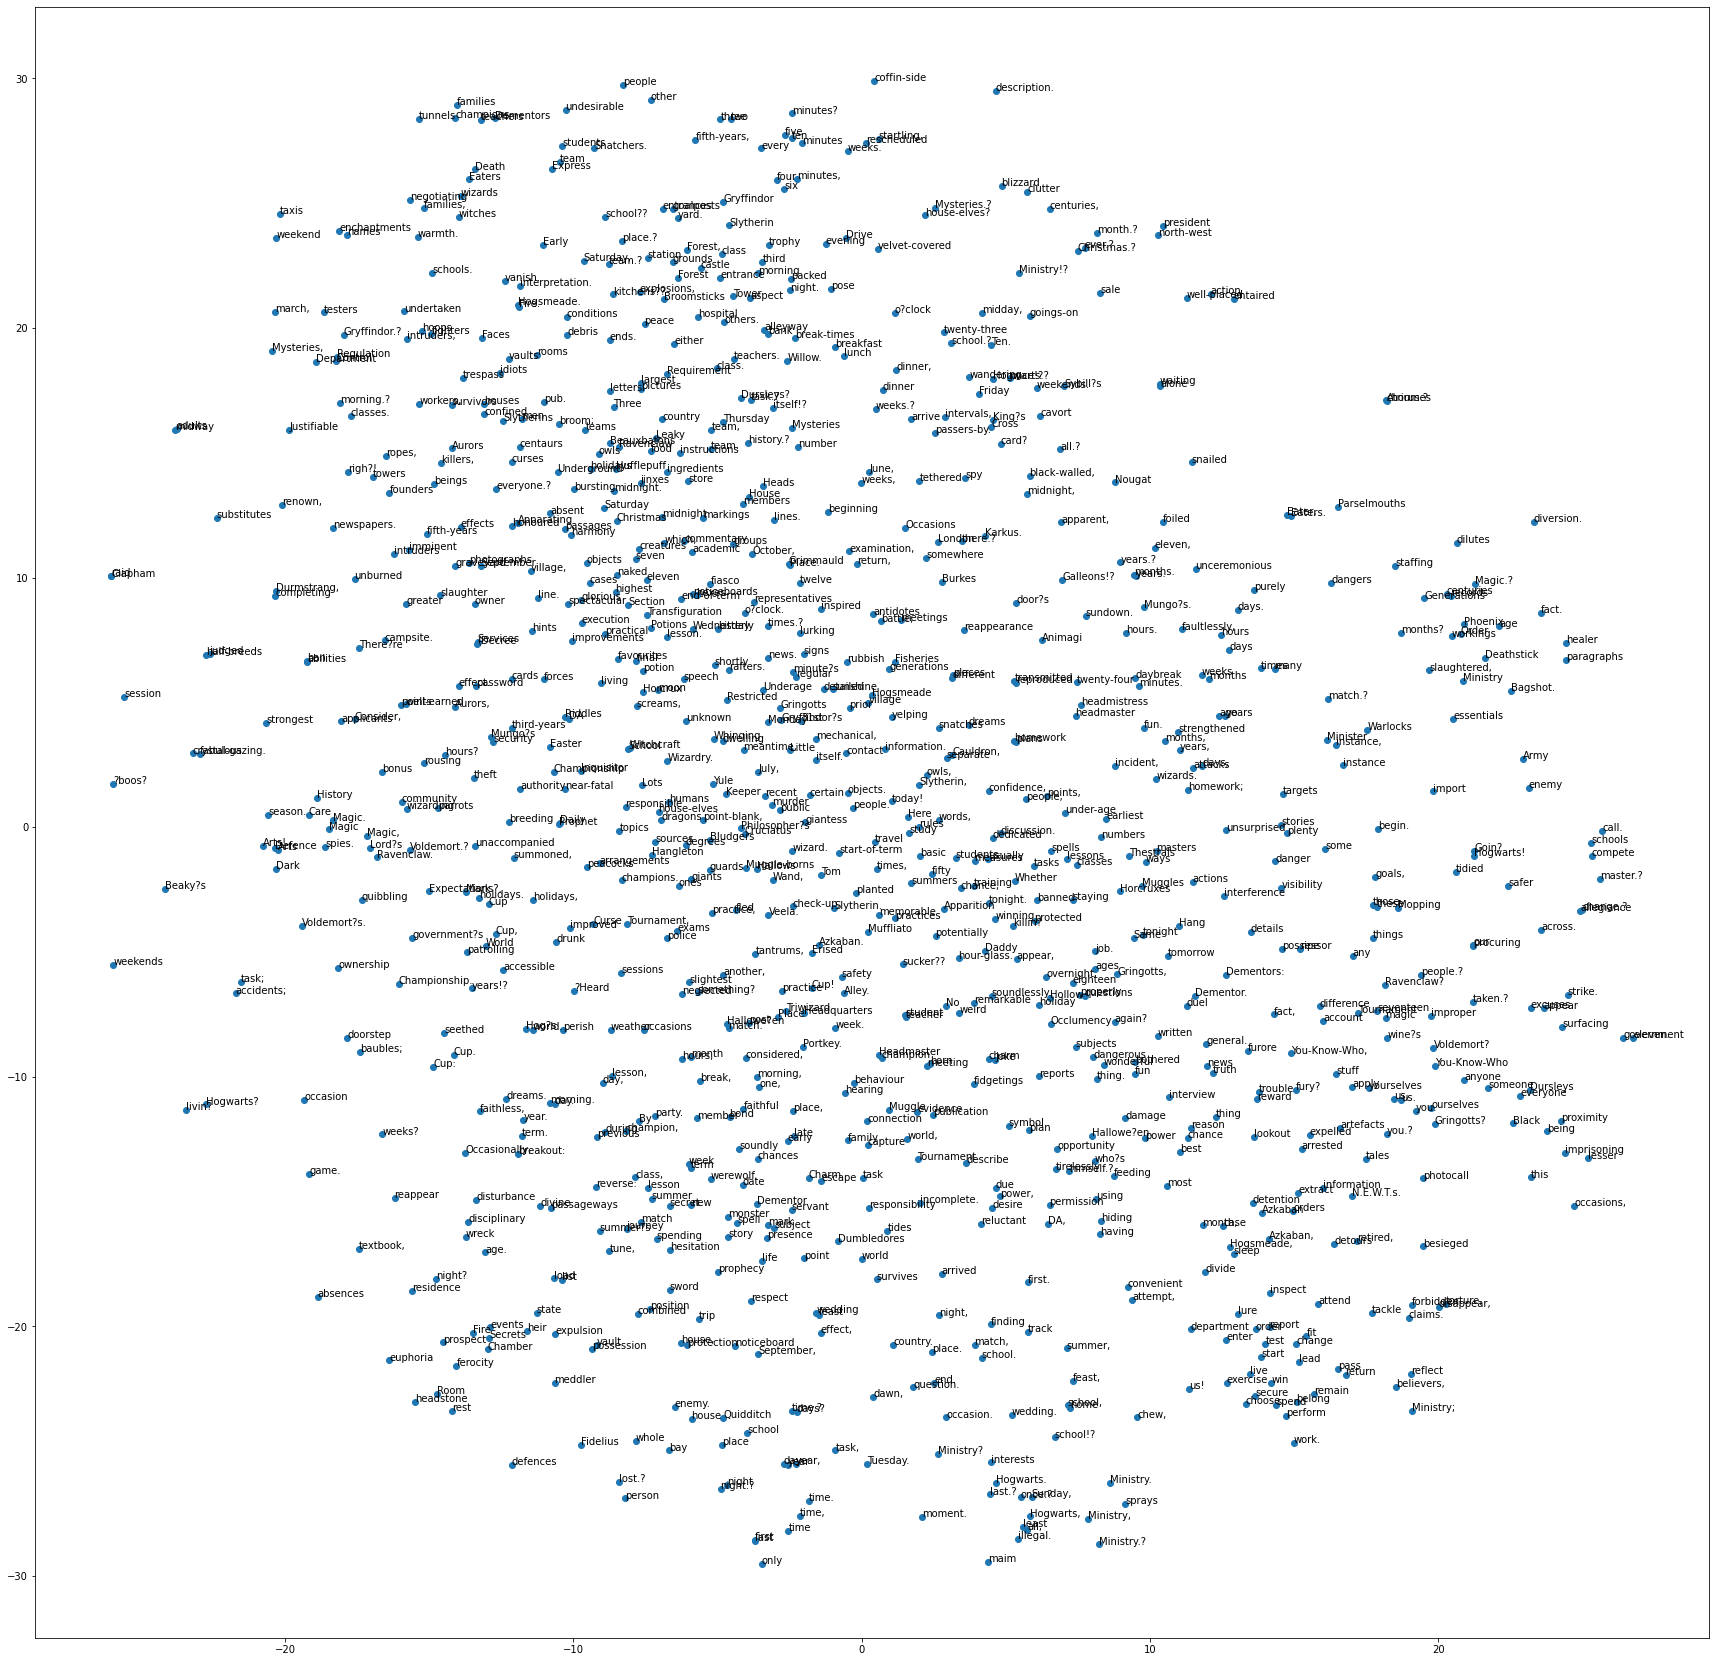

In [14]:
plt.figure(figsize=(30,30))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))